In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def baseline_signal(baseline_time_sec, fs):
    signal_len = int(fs*baseline_time_sec)
    baseline_signal = np.random.randn(signal_len)
    return baseline_signal

def epochs_without_erp(number_of_epoch, epoch_time_sec, fs):
    signal_len = int(number_of_epoch*epoch_time_sec*fs)
    epochs_without_erp = np.random.randn(signal_len)
    return epochs_without_erp


def base_signal_generation(baseline_time_sec, epoch_time_sec, number_of_epoch, fs):
    # Ensure signal length accommodates complete epochs
    signal_len = int(fs * baseline_time_sec + number_of_epoch * epoch_time_sec * fs)
    base_signal = np.random.randn(signal_len)
    time = np.arange(0, signal_len) / fs  # More precise time array
    return base_signal, time

def generate_sin_wave(start_time, end_time, frequency_list, amplitude, fs, theta):
    time = np.arange(start_time, end_time, 1/fs)
    sin_combined = np.zeros_like(time)
    for freq in frequency_list:
        sinewave = amplitude * np.sin(2 * np.pi * freq * time + theta)
        sin_combined = sin_combined + sinewave
    return sin_combined


def add_erp_to_epochs(signal, baseline_time_sec, epoch_time_sec, fs, 
                      erp_start_sec, erp_end_sec, frequency_list, 
                      amplitude=1, theta=0, epoch_indices=None):
    """
    Add ERP (sine wave) to specific epochs at a defined time window.
    
    Parameters:
    -----------
    signal : ndarray
        The base signal to modify
    baseline_time_sec : float
        Duration of baseline in seconds
    epoch_time_sec : float
        Duration of each epoch in seconds
    fs : int
        Sampling frequency
    erp_start_sec : float
        Start time of ERP within each epoch (relative to epoch start)
    erp_end_sec : float
        End time of ERP within each epoch (relative to epoch start)
    frequency_list : list
        List of frequencies to include in the sine wave
    amplitude : float
        Amplitude of the sine wave
    theta : float
        Phase offset
    epoch_indices : list or None
        Specific epoch indices to add ERP to. If None, adds to all epochs.
    
    Returns:
    --------
    signal : ndarray
        Modified signal with ERPs added
    """
    # Generate the ERP signal
    erp_signal = generate_sin_wave(start_time=erp_start_sec, end_time=erp_end_sec,
                                    frequency_list=frequency_list, amplitude=amplitude,
                                    fs=fs, theta=theta)
    erp_len = len(erp_signal)
    
    # Calculate epoch start positions
    signal_len = len(signal)
    epoch_starts = np.arange(int(baseline_time_sec*fs), signal_len, int(fs*epoch_time_sec))
    
    # If specific epochs are requested, filter the epoch starts
    if epoch_indices is not None:
        epoch_starts = epoch_starts[epoch_indices]
    
    # Add ERP to each epoch
    for epoch_start in epoch_starts:
        # Calculate absolute position in signal
        erp_start_index = epoch_start + int(erp_start_sec * fs)
        erp_end_index = erp_start_index + erp_len
        
        # Check bounds
        if erp_end_index <= len(signal):
            signal[erp_start_index:erp_end_index] += erp_signal
        else:
            print(f"Warning: ERP at index {epoch_start} exceeds signal length")
    
    return signal, 


NameError: name 'aon' is not defined

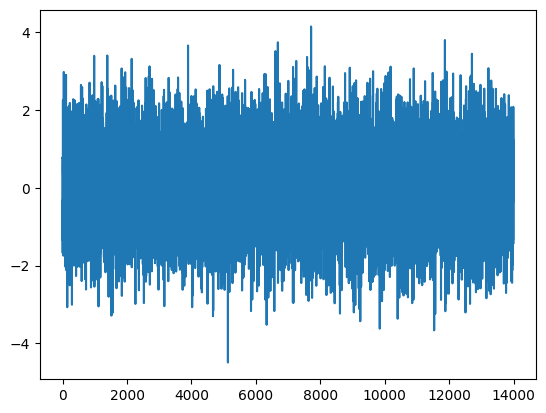

In [17]:
baseline_time_sec = 2
epoch_time_sec = 0.7
number_of_epoch = 10
fs=2000

erp_start_sec = 0.4
erp_end_sec = 0.5
frequency_list = [40]


aon_1_bsline = baseline_signal(baseline_time_sec, fs=2000)

aon_1_base_sig = epochs_without_erp(number_of_epoch=number_of_epoch, epoch_time_sec=epoch_time_sec, fs=fs)

aon_1_erp = add_erp_to_epochs(aon_1_base_sig, baseline_time_sec=baseline_time_sec, epoch_time_sec=epoch_time_sec, fs=fs, erp_start_sec=0.4, erp_end_sec=0.5, frequency_list=[40])


plt.plot(aon_1_erp)

18000
18000
sin_combined length: 200
[ 4000  5400  6800  8200  9600 11000 12400 13800 15200 16600]
4000 4200
5400 5600
6800 7000
8200 8400
9600 9800
11000 11200
12400 12600
13800 14000
15200 15400
16600 16800


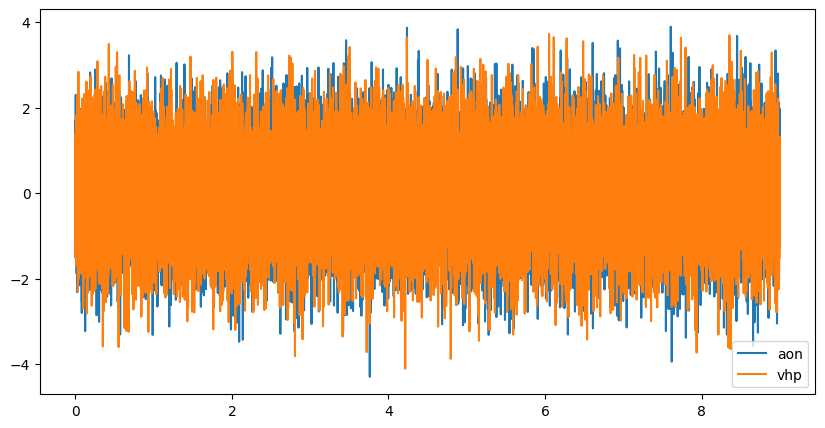

In [15]:


baseline_time_sec = 2
epoch_time_sec = 0.7
number_of_epoch = 10
fs = 2000
signal_len = fs*baseline_time_sec + fs*epoch_time_sec*number_of_epoch

aon_1, t1 = base_signal_generation(baseline_time_sec=baseline_time_sec, epoch_time_sec=epoch_time_sec, 
                                     number_of_epoch=number_of_epoch, fs=fs)
vhp_1, t2 = base_signal_generation(baseline_time_sec=baseline_time_sec, epoch_time_sec=epoch_time_sec, 
                                     number_of_epoch=number_of_epoch, fs=fs)

sin_start_sec = 0.4
sin_end_sec = 0.5
frequency_list = [40]
theta = 0
amplitude = 1

sin_combined = generate_sin_wave(start_time=sin_start_sec, end_time=sin_end_sec, 
                                  frequency_list=frequency_list, amplitude=amplitude, fs=fs, theta=theta)
print(f"sin_combined length: {len(sin_combined)}")

epoch_times = np.arange(int(baseline_time_sec*fs), int(signal_len), int(fs*epoch_time_sec))
print(epoch_times)

# Use the length of sin_combined to determine the end index
sin_len = len(sin_combined)

for epochi in epoch_times:
    erp_start_index = epochi
    erp_end_index = epochi + sin_len  # Use actual length instead of calculation
    print(erp_start_index, erp_end_index)
    
    aon_1[erp_start_index:erp_end_index] = aon_1[erp_start_index:erp_end_index] + sin_combined
    vhp_1[erp_start_index:erp_end_index] = vhp_1[erp_start_index:erp_end_index] + sin_combined

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.plot(t1, aon_1, label="aon")
axs.plot(t2, vhp_1, label="vhp")
axs.legend()
plt.show()

## Generating Artificial ERP data and plotting it

### For simplicity, I will generate 2 channels of data with 10 epochs of 700ms each. The data will begin with 2seconds of baseline data that will contain just noise. 

### Combining sine waves with the base_signal

## Data pre-processing (ref subtraction, padding, baseline subtraction, notch filter)

## Power Analysis

In [5]:
import mne
mne_epoch_blank =np.zeros((10,2,int(epoch_time_sec*fs)))
epoch_times = np.arange(int(baseline_time_sec*fs), int(signal_len), int(fs*epoch_time_sec))
print(epoch_times)
for epochi, epoch_start_index in enumerate(epoch_times):
    erp_end_index = epoch_start_index +int(epoch_time_sec*fs)
    mne_epoch_blank[epochi, 0, :] = aon_1[epoch_start_index:erp_end_index]
    mne_epoch_blank[epochi, 1, :] = vhp_1[epoch_start_index:erp_end_index]

info = mne.create_info(ch_names=list(["AON_1", "vHp_1"]), sfreq=fs, ch_types='eeg')
mne_epoch_erp = mne.EpochsArray(mne_epoch_blank, info)


def get_power_tfr(epoch):
    fmin=2.5
    fmax=100
    fs=2000
    freqs = np.arange(fmin,fmax)
    n_cycles = freqs/3

    power = epoch.compute_tfr(
        method="morlet", freqs=freqs, n_cycles=n_cycles, return_itc=False, average=False
        
    )

    return power



[ 4000  5400  6800  8200  9600 11000 12400 13800 15200 16600]
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated


<EpochsArray | 10 events (all good), 0 – 0.7 s (baseline off), ~115 KiB, data loaded,
 '1': 10>
<Power Estimates from Epochs, morlet method | 10 epochs × 1 channels × 98 freqs × 1400 times, 2.5 - 99.5 Hz, 0.00 - 0.70 s, 10.5 MiB>
No baseline correction applied


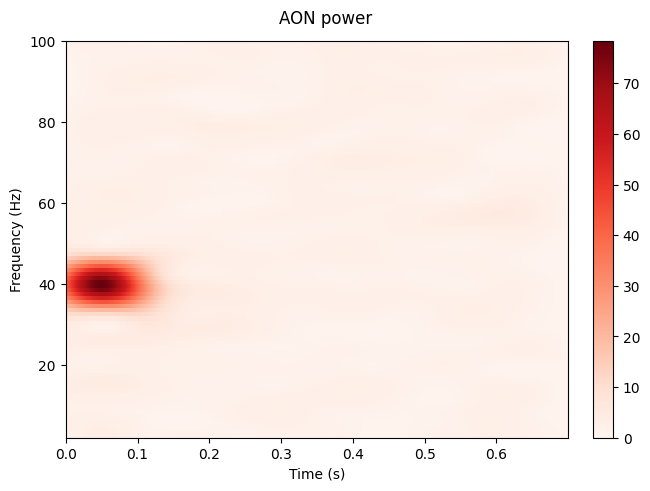

TypeError: Invalid shape (1, 98, 1400) for image data

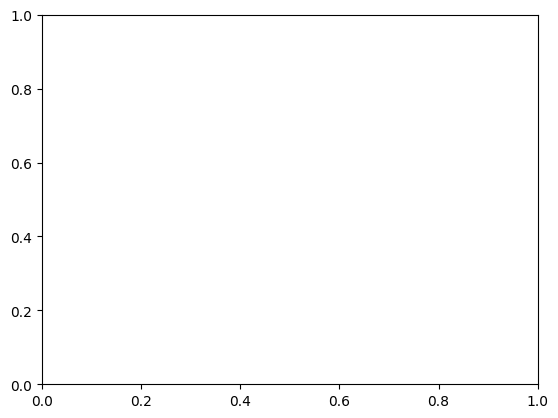

In [6]:
aon1epoch = mne_epoch_erp.pick("AON_1")
print(aon1epoch)
aon_1_power = get_power_tfr(mne_epoch_erp.pick("AON_1"))
print(aon_1_power)
averaged_epoch_power = aon_1_power.average(dim='epochs')
averaged_epoch_power.plot(title="AON power", combine='mean', vlim = (0, None))
mean = np.mean(averaged_epoch_power.get_data(), axis=0)
fig,ax=plt.subplots(1,1)

im = ax.imshow(X= averaged_epoch_power.get_data(), cmap = 'viridis', aspect='auto', origin='lower')

## Coherence Analysis

In [ ]:
import mne
mne_epoch_blank =np.zeros((number_of_epoch,2,int(epoch_time_sec*fs)))
epoch_times = np.arange(int(baseline_time_sec*fs), int(signal_len), int(fs*epoch_time_sec))
print(epoch_times)
for epochi, epoch_start_index in enumerate(epoch_times):
    erp_end_index = epoch_start_index +int(epoch_time_sec*fs)
    print(epoch_start_index, erp_end_index)
    mne_epoch_blank[epochi, 0, :] = aon_1_erp[epoch_start_index:erp_end_index]
    mne_epoch_blank[epochi, 1, :] = aon_1_erp[epoch_start_index:erp_end_index]

info = mne.create_info(ch_names=list(["AON_1", "vHp_1"]), sfreq=fs, ch_types='eeg')
mne_epoch_erp = mne.EpochsArray(mne_epoch_blank, info)


[ 4000  5400  6800  8200  9600 11000 12400 13800 15200 16600]
4000 5400
5400 6800
6800 8200
8200 9600
9600 11000
11000 12400
12400 13800
13800 15200


ValueError: could not broadcast input array from shape (200,) into shape (1400,)

C:\Users\sinha\AppData\Local\Temp\ipykernel_36452\2082932334.py:9: RuntimeWarning: There were no Annotations stored in <EpochsArray | 10 events (all good), 0 – 0.7 s (baseline off), ~225 KiB, data loaded,
 '1': 10>, so metadata was not modified.
  con = mne_connectivity.spectral_connectivity_epochs(mne_epoch_erp, method='coh', sfreq=int(fs),
C:\Users\sinha\AppData\Local\Temp\ipykernel_36452\2082932334.py:9: RuntimeWarning: fmin=1.000 Hz corresponds to 0.700 < 5 cycles based on the epoch length 0.700 sec, need at least 5.000 sec epochs or fmin=7.143. Spectrum estimate will be unreliable.
  con = mne_connectivity.spectral_connectivity_epochs(mne_epoch_erp, method='coh', sfreq=int(fs),
c:\Users\sinha\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\sinha\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarni

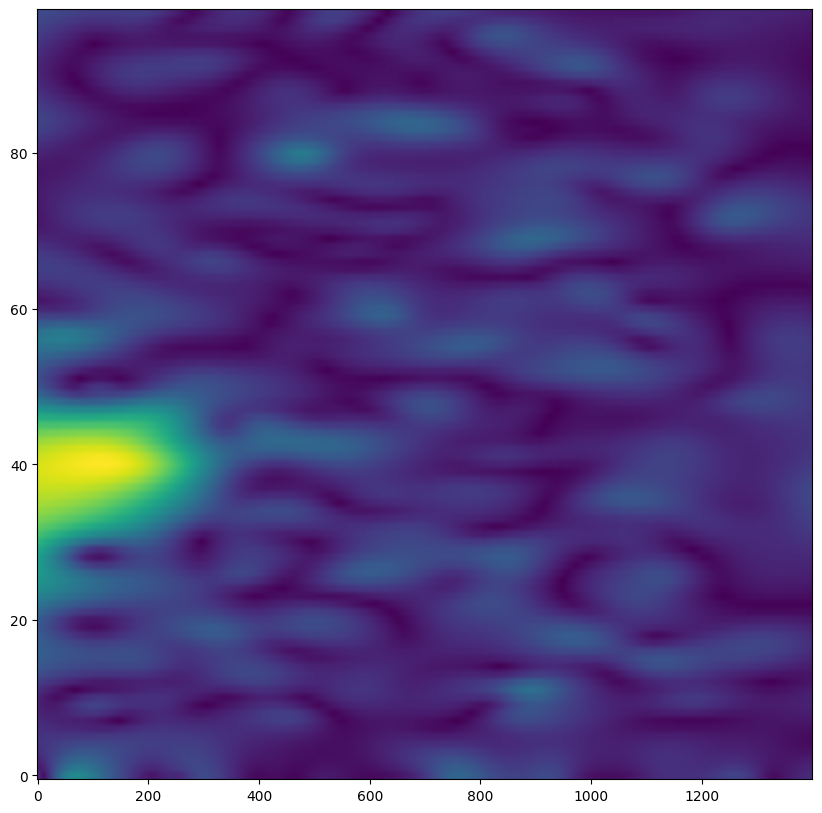

In [10]:
import mne_connectivity

fmin=1
fmax=100
fs=2000
freqs = np.arange(fmin,fmax)
n_cycles = freqs/3

con = mne_connectivity.spectral_connectivity_epochs(mne_epoch_erp, method='coh', sfreq=int(fs),
                                    mode='cwt_morlet', cwt_freqs=freqs,
                                    cwt_n_cycles=n_cycles, verbose=False, fmin=fmin, fmax=fmax, faverage=False)

coh = con.get_data(output='dense')
indices = con.names
row=[]
aon_vHp_con=[]
for i in range(coh.shape[0]):
    for j in range(coh.shape[1]):
        if 'AON' in indices[j] and 'vHp' in indices[i]:
            coherence= coh[i,j,:,:]
            coherence=np.arctanh(coherence)
            aon_vHp_con.append(coherence)
        row.append(np.mean(aon_vHp_con, axis=0))

fig, ax = plt.subplots(1,1, figsize =(10,10))
ax.imshow(coherence, aspect='auto', origin='lower')

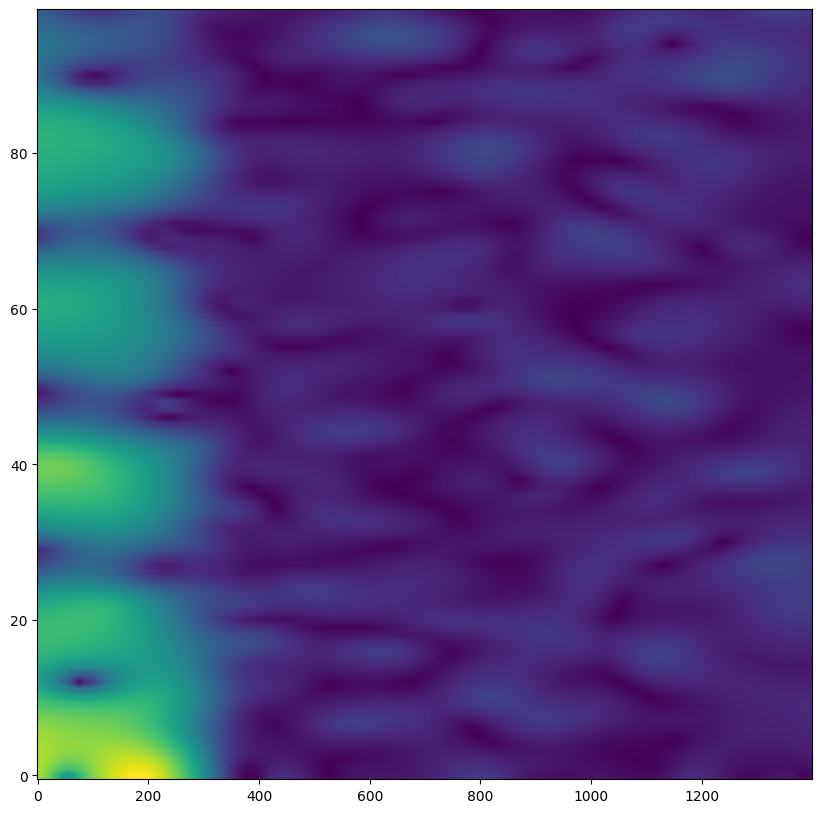

In [ ]:
_